#### NLP KELOMPOK 5
SENTIMENT ANALYSIS REVIEWS SPOTIFY

**tanda " # " adalah penjelasan kode**

REFERENSI CODE
> KAGGLE : https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022/code




In [9]:
#update module NLTK
!pip install nltk --upgrade

In [10]:
#melakukan import module-module yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string

import nltk
nltk.download("wordnet")
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# untuk mengendalikan peringatan
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [12]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# membaca Dataset yang telah di upload di drive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews.csv")
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# MEnghapus kolom yang tidak diperlukan
df.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
df

,Review,Rating,Total_thumbsup
0,"Great music service, the audio is high quality...",5,2
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,0
3,Really buggy and terrible to use as of recently,1,1
4,Dear Spotify why do I get songs that I didn't ...,1,1
...,...,...,...
61589,Even though it was communicated that lyrics fe...,1,6
61590,"Use to be sooo good back when I had it, and wh...",1,0
61591,This app would be good if not for it taking ov...,2,10
61592,The app is good hard to navigate and won't jus...,2,1


In [16]:
#Cari jumlah data kosong
df.isnull().sum().sort_values(ascending = False)

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

# Text Preprocessing:

In [17]:
# cek data ke 5 dari kolom review
df['Review'][4]

"Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?"

In [18]:
import re

# Kamus kontraksi
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what's": "what is",
    "when's": "when is",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Fungsi untuk menggantikan kontraksi dalam teks
def replace_contractions(Review):
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, Review)

# Contoh penggunaan fungsi
Review = "I'm going to the store, but I can't buy anything because it's expensive."
Review = replace_contractions(Review)
print(Review)


I am going to the store, but I cannot buy anything because it is expensive.


Fungsi ini berfungsi untuk mengubah kata-kata yang singkat menjadi bentuk lengkapnya dalam sebuah teks. Misalnya, jika kita memiliki kata seperti "can't" dalam teks, maka fungsi ini akan mengubahnya menjadi "cannot"

In [19]:
# Menyimpan hasil expanding ke DataFrame
def expand_contractions(text, contractions_dict):

    words = text.split()
    new_words = []
    for word in words:
        if word.lower() in contractions_dict:
            new_words.extend(contractions_dict[word.lower()].split("/"))
        else:
            new_words.append(word)
    return " ".join(new_words)

df["Review"] = df["Review"].apply(lambda x: expand_contractions(x, contractions_dict))


### 2. Lowercase:

In [20]:
# Melakukan Lowercase
df['Review'] = df['Review'].str.lower()
df

,Review,Rating,Total_thumbsup
0,"great music service, the audio is high quality...",5,2
1,please ignore previous negative rating. this a...,5,1
2,"this pop-up ""get the best spotify experience o...",4,0
3,really buggy and terrible to use as of recently,1,1
4,dear spotify why do i get songs that i did not...,1,1
...,...,...,...
61589,even though it was communicated that lyrics fe...,1,6
61590,"use to be sooo good back when i had it, and wh...",1,0
61591,this app would be good if not for it taking ov...,2,10
61592,the app is good hard to navigate and will not ...,2,1


### 3. Remove punctuations:

In [21]:
# Melakukan Remove punctuations
import re
df['Review'] = df['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df

,Review,Rating,Total_thumbsup
0,great music service the audio is high quality ...,5,2
1,please ignore previous negative rating this ap...,5,1
2,this popup get the best spotify experience on ...,4,0
3,really buggy and terrible to use as of recently,1,1
4,dear spotify why do i get songs that i did not...,1,1
...,...,...,...
61589,even though it was communicated that lyrics fe...,1,6
61590,use to be sooo good back when i had it and whe...,1,0
61591,this app would be good if not for it taking ov...,2,10
61592,the app is good hard to navigate and will not ...,2,1


### 4) Removing stopwords:

In [22]:
# Import Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Review'] = df['Review'].apply(lambda x: remove_stopwords(x))

In [24]:
# Mengecek DataFrame
df

,Review,Rating,Total_thumbsup
0,great music service audio high quality app eas...,5,2
1,please ignore previous negative rating app sup...,5,1
2,popup get best spotify experience android 12 a...,4,0
3,really buggy terrible use recently,1,1
4,dear spotify get songs put playlist shuffle play,1,1
...,...,...,...
61589,even though communicated lyrics feature availa...,1,6
61590,use sooo good back downloaded free version cou...,1,0
61591,app would good taking device start comp spotif...,2,10
61592,app good hard navigate let play song click pla...,2,1


### 5) Lemmatization:


In [25]:
# Melakukan Lemmatization
lemmat = WordNetLemmatizer()
df.loc[:,'Review'] = df.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))

In [26]:
# Mendefinisakan Good, Neutral, dan Bad
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

df['Rating'] = df['Rating'].apply(transform_ratings)
df['length'] = df['Review'].str.len()

In [27]:
df.head

<bound method NDFrame.head of                                                   Review Rating  \
0      great music service audio high quality app eas...   Good   
1      please ignore previous negative rating app sup...   Good   
2      popup get best spotify experience android 12 a...   Good   
3                     really buggy terrible use recently    Bad   
4        dear spotify get song put playlist shuffle play    Bad   
...                                                  ...    ...   
61589  even though communicated lyric feature availab...    Bad   
61590  use sooo good back downloaded free version cou...    Bad   
61591  app would good taking device start comp spotif...    Bad   
61592  app good hard navigate let play song click pla...    Bad   
61593  good sometimes doesnt load music play like 8 s...   Good   

       Total_thumbsup  length  
0                   2      79  
1                   1      69  
2                   0      74  
3                   1      34  
4    

# Label Encoding:

In [28]:
# Melakukan Label Encoder untuk 0 = bad, 1 = neutral, 2 = good
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Rating'] = label_encoder.fit_transform(df['Rating'])
y = df['Rating'].values
print('Hasil Encode:',np.unique(y) )

Hasil Encode: [0 1 2]


# Vectorization:

Vectorization refers to the process of converting non-numerical data, such as text or images, into numerical vectors that can be used as input to machine learning models or other algorithms.

## Types of vectorization:
#### 1)  Count Vectorization:
#### 2)  TF-IDF Vectorization:

## Performing tf-idf vectorization:

In [29]:
  # Melakukan Vectorization
  vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=2500)
  X = vectorizer.fit_transform(df['Review'].values.tolist()).toarray()
  y = df['Rating'].values

# Train-test split:

In [30]:
# Melakukan Train Test Split dengan test size 0.2 / 20% sisanya train 0.8 / 80%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building and evaluation:

**Logistic Regression**

In [31]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [32]:
# Predict Akurasi MOdelling
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi: 0.7843169088400033
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      4909
           1       0.85      0.87      0.86      5998
           2       0.32      0.05      0.08      1412

    accuracy                           0.78     12319
   macro avg       0.63      0.60      0.58     12319
weighted avg       0.74      0.78      0.75     12319



In [33]:
# Pilih indeks review yang ingin diuji dari dataset
review_index = 73  # contoh: memilih review pertama dalam dataset

# Ambil vektor fitur dari review tersebut
selected_review_vectorized = X[review_index].reshape(1, -1)

# Melakukan prediksi
predicted_label = model.predict(selected_review_vectorized)

# Mengonversi label numerik kembali ke label asli
predicted_sentiment = label_encoder.inverse_transform(predicted_label)

# Mendapatkan teks review asli dari DataFrame
original_review_text = df.iloc[review_index]['Review']

# Menampilkan hasil
print("Review yang di UJI:", original_review_text)
print("Sentimen dari review tersebut adalah:", predicted_sentiment[0])

Review yang di UJI: great song selection amazing audio quality however problem everyday casting google home connection issue lose control volume need open app able change volume inconvenience also think option shuffle song rather put playlist like every single song time consuming making playlist could easier selecting multiple album example
Sentimen dari review tersebut adalah: Neutral


**PENGUJIAN**

In [34]:
# Contoh data review baru
new_review = "really good"

# Pra-pemrosesan dan vektorisasi
new_review = " ".join(lemmat.lemmatize(word) for word in new_review.split())  # Lemmatization
new_review_vectorized = vectorizer.transform([new_review]).toarray()  # Vektorisasi


**Prediksi Sentimen:**

In [35]:
# Melakukan prediksi
predicted_label = model.predict(new_review_vectorized)

# Mengonversi label numerik kembali ke label asli
predicted_sentiment = label_encoder.inverse_transform(predicted_label)
print("Sentimen dari review tersebut adalah:", predicted_sentiment[0])


Sentimen dari review tersebut adalah: Good


**MENCARI NEUTRAL**

In [36]:
# Dapatkan prediksi untuk seluruh dataset
all_predictions = model.predict(X)

# Mengonversi label numerik kembali ke label asli
all_predicted_sentiments = label_encoder.inverse_transform(all_predictions)


In [37]:
# Tambahkan kolom prediksi ke DataFrame asli
df['Predicted_Sentiment'] = all_predicted_sentiments


In [38]:
# Filter DataFrame untuk mendapatkan review yang diprediksi sebagai "Neutral"
neutral_reviews = df[df['Predicted_Sentiment'] == 'Neutral']

# Tampilkan review "Neutral"
print(neutral_reviews[['Review', 'Predicted_Sentiment']])


                                                  Review Predicted_Sentiment
36     sometimes try listen playlist play first song ...             Neutral
61     dose go playing liked song song even looked ge...             Neutral
73     great song selection amazing audio quality how...             Neutral
186    love app wish could option turn added part pla...             Neutral
188    put song random like 2k song always seems one ...             Neutral
...                                                  ...                 ...
61423  enjoying fact cannot click artist see list son...             Neutral
61527  app ok suggestion bio option profile accurate ...             Neutral
61534  love app would really appreciate two thing 1 a...             Neutral
61537  app great except bug try go backwards middle s...             Neutral
61570  nice app premium subscription show add ok show...             Neutral

[1137 rows x 2 columns]


In [39]:
# Filter DataFrame untuk mendapatkan review yang diprediksi sebagai "Good"
good_reviews = df[df['Predicted_Sentiment'] == 'Good']

# Filter DataFrame untuk mendapatkan review yang diprediksi sebagai "Neutral"
neutral_reviews = df[df['Predicted_Sentiment'] == 'Neutral']

# Filter DataFrame untuk mendapatkan review yang diprediksi sebagai "Bad"
bad_reviews = df[df['Predicted_Sentiment'] == 'Bad']

# Tampilkan jumlah dan beberapa contoh review untuk setiap kategori
print("Jumlah Good Reviews:", len(good_reviews))
print(good_reviews[['Review', 'Predicted_Sentiment']].head())

print("\nJumlah Neutral Reviews:", len(neutral_reviews))
print(neutral_reviews[['Review', 'Predicted_Sentiment']].head())

print("\nJumlah Bad Reviews:", len(bad_reviews))
print(bad_reviews[['Review', 'Predicted_Sentiment']].head())

Jumlah Good Reviews: 31093
                                              Review Predicted_Sentiment
0  great music service audio high quality app eas...                Good
1  please ignore previous negative rating app sup...                Good
2  popup get best spotify experience android 12 a...                Good
6       love selection lyric provided song listening                Good
8  great app best mp3 music app ever used one pro...                Good

Jumlah Neutral Reviews: 1137
                                                Review Predicted_Sentiment
36   sometimes try listen playlist play first song ...             Neutral
61   dose go playing liked song song even looked ge...             Neutral
73   great song selection amazing audio quality how...             Neutral
186  love app wish could option turn added part pla...             Neutral
188  put song random like 2k song always seems one ...             Neutral

Jumlah Bad Reviews: 29364
                            

**VISUALITATION**

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

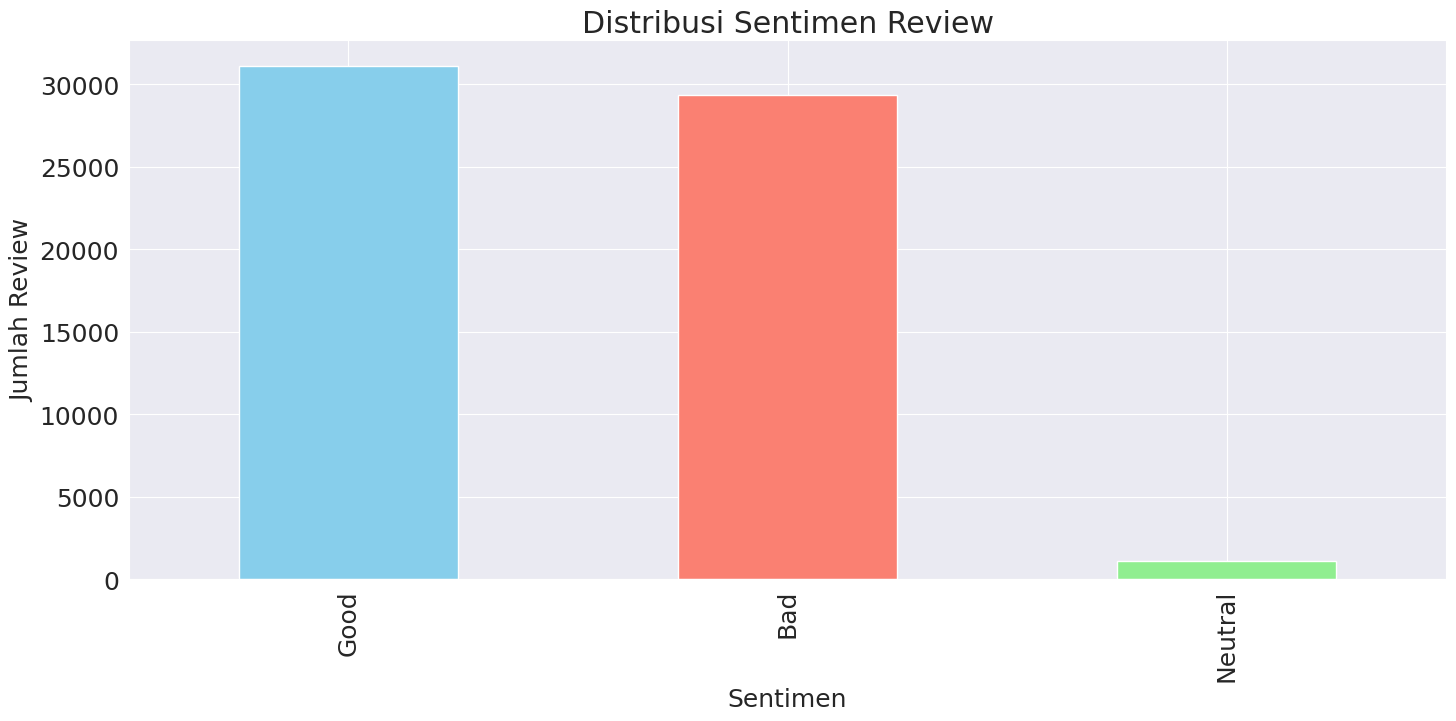

In [41]:
# Menghitung jumlah review untuk setiap sentimen
sentiment_counts = df['Predicted_Sentiment'].value_counts()

# Membuat bar plot
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.title('Distribusi Sentimen Review')
plt.show()


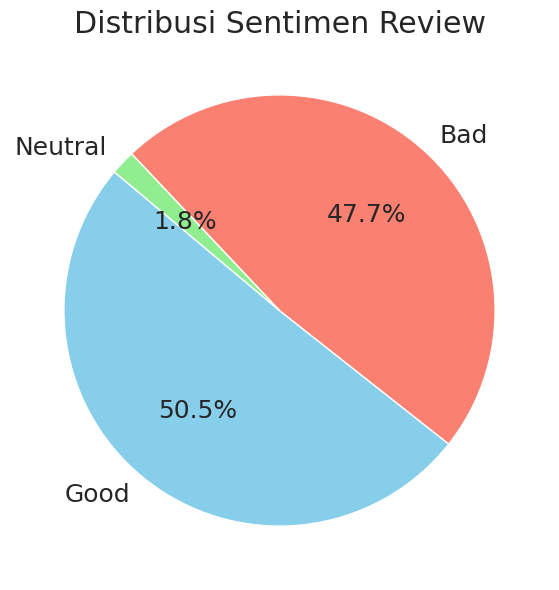

In [42]:
# Membuat pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('')
plt.title('Distribusi Sentimen Review')
plt.show()


In [43]:
from tabulate import tabulate

def truncate_text(text, max_length=50):
    if len(text) > max_length:
        return text[:max_length] + '...'
    return text



# Menampilkan beberapa komentar "Good"
print("+--------------              GOOD             --------------+")
good_reviews_table = good_reviews[['Review']].head()
good_reviews_table['Review'] = good_reviews_table['Review'].apply(truncate_text)
print(tabulate(good_reviews_table, headers='keys', tablefmt='pretty'))
print("\n" + "="*80 + "\n")

# Menampilkan beberapa komentar "Neutral"
print("+--------------              NEUTRAL           ---------------+")
neutral_reviews_table = neutral_reviews[['Review']].head()
neutral_reviews_table['Review'] = neutral_reviews_table['Review'].apply(truncate_text)
print(tabulate(neutral_reviews_table, headers='keys', tablefmt='pretty'))
print("\n" + "="*80 + "\n")

# Menampilkan beberapa komentar "Bad"
print("+--------------               BAD            ---------------+")
bad_reviews_table = bad_reviews[['Review']].head()
bad_reviews_table['Review'] = bad_reviews_table['Review'].apply(truncate_text)
print(tabulate(bad_reviews_table, headers='keys', tablefmt='pretty'))


+--------------              GOOD             --------------+
+---+-------------------------------------------------------+
|   |                        Review                         |
+---+-------------------------------------------------------+
| 0 | great music service audio high quality app easy us... |
| 1 | please ignore previous negative rating app super g... |
| 2 | popup get best spotify experience android 12 annoy... |
| 6 |     love selection lyric provided song listening      |
| 8 | great app best mp3 music app ever used one problem... |
+---+-------------------------------------------------------+


+--------------              NEUTRAL           ---------------+
+-----+-------------------------------------------------------+
|     |                        Review                         |
+-----+-------------------------------------------------------+
| 36  | sometimes try listen playlist play first song try ... |
| 61  | dose go playing liked song song even looked gettin